<a href="https://colab.research.google.com/github/aalligithub/persian_llm.ipynb/blob/main/persian_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM چیست؟

مدل‌های زبان بزرگ دسته‌ای از مدل‌های پایه هستند که بر روی مقادیر بسیار زیاد داده آموزش دیده‌اند و آن‌ها را قادر به درک و تولید زبان طبیعی و انواع دیگر محتوا برای انجام طیف وسیعی از وظایف می‌کند.


مدل بزرگ زبان به دلیل نقشی که در ارائه هوش مصنوعی مولد به خط مقدم منافع عمومی ایفا کرده اند، و همچنین به دلیل تمرکز سازمان ها برای استفاده از هوش مصنوعی در بسیاری از کارکردهای تجاری و موارد استفاده، به نامی شناخته شده تبدیل شده اند.


در خارج از زمینه سازمانی، ممکن است به نظر برسد که ال ال ام ها همراه با پیشرفت های جدید در هوش مصنوعی مولد به طور غیر منتظره وارد شده اند . با این حال، بسیاری از شرکت ها، از جمله شرکت آی بی ام، سال ها را صرف اجرای در سطوح مختلف کرده اند تا توانایی های درک زبان طبیعی (NLU) و پردازش زبان طبیعی (NLP) خود را افزایش دهند. این اتفاق در کنار پیشرفت‌هایی در یادگیری ماشین، مدل‌های یادگیری ماشین، الگوریتم‌ها، شبکه‌های عصبی و مدل‌های ترانسفورماتور که معماری این سیستم‌های هوش مصنوعی را فراهم می‌کنند، رخ داده است.


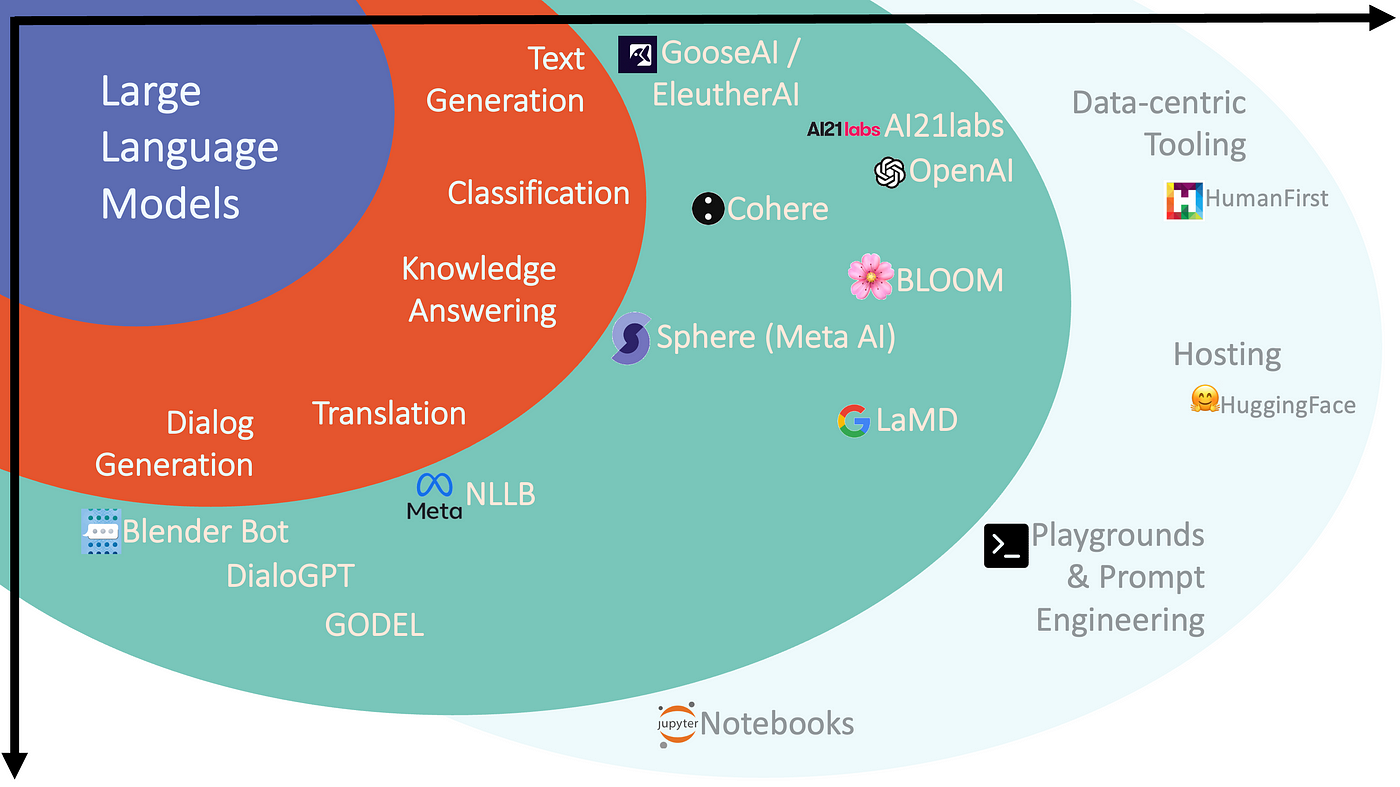



مدل های بزرگ زبان ها دسته‌ای از مدل‌های پایه هستند که بر روی حجم عظیمی از داده‌ها آموزش می‌بینند تا قابلیت‌های اساسی مورد نیاز برای هدایت موارد و برنامه‌های کاربردی متعدد و همچنین حل بسیاری از وظایف را فراهم کنند. این در تضاد کامل با ایده ساخت و آموزش مدل‌های خاص دامنه برای هر یک از این موارد استفاده به صورت جداگانه است، که تحت بسیاری از معیارها (مهمتر از همه هزینه و زیرساخت) غیر بهینه است، هم‌افزایی را خفه می‌کند و حتی می‌تواند منجر به عملکرد ضعیف شود.



# نحوه کار LLM ها

  مدل های بزرگ زبان ها با استفاده از تکنیک های یادگیری عمیق و حجم وسیعی از داده های متنی عمل می کنند. این مدل‌ها معمولاً مبتنی بر معماری ترانسفورماتور هستند، مانند ترانسفورماتور از پیش آموزش‌دیده مولد، که در مدیریت داده‌های متوالی مانند ورودی متن برتری دارد. ها از چندین لایه شبکه عصبی تشکیل شده‌اند که هر کدام دارای پارامترهایی هستند که می‌توان آنها را در طول آموزش تنظیم کرد، که توسط لایه‌های متعددی به نام مکانیسم توجه که روی بخش‌های خاصی از مجموعه‌های داده تماس می‌گیرد، بیشتر تقویت می‌شوند.

در طول فرآیند آموزش، این مدل ها یاد می گیرند که کلمه بعدی را در یک جمله بر اساس زمینه ارائه شده توسط کلمات قبلی پیش بینی کنند. مدل این کار را از طریق نسبت دادن یک امتیاز احتمال به تکرار کلماتی که نشانه گذاری شده اند انجام می دهد - به دنباله های کوچکتری از کاراکترها تقسیم می شوند. سپس این نشانه‌ها به جاسازی‌هایی تبدیل می‌شوند که نمایش‌های عددی این زمینه هستند.

In [ ]:
!pip install transformers datasets accelerate # مدلی که برای پروژه در نظر گرفته ایم از معماری ترنسفورمر پیروی میکند هم کتابخانه مخصوص هم ابزار افزایش سرعت را نصب میکنیم
!pip install torch # pytorch فریم ورک اوپن سورس پایتون برای ساخت مدل های دیپ لرنینگ


برای فارسی زبان کردن مدل زبان از پیکرهٔ درختی وابستگی فارسی اوپسالا (UPDT) استفاده شده است که از لینک زیر قابل دسترسی است برای آموزش مدل فایل ها را از پروژه دانلود و آپلود کنید

Summary
The Persian Universal Dependency Treebank (Seraji) is based on Uppsala Persian Dependency Treebank (UPDT). The conversion of the UPDT to the Universal Dependencies was performed semi-automatically with extensive manual checks and corrections.



```
https://github.com/UniversalDependencies/UD_Persian-Seraji.git
```

همچنین بهتر است برای استفاده AccessToken HuggingFace تهیه کنید


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset

model_name = "tiiuae/falcon-rw-1b"  # مدل نیم ما بسیار مهم است زیرا مدلی که اینجا وارد کنیم همان مدلی است که آموزش داده میشود به عنوان پیش فرض کوچک ترین مدل برای سرعت بیشتر ران کردن اضافه شده

# گزینه های بیشتر برای مدل:
# tiiuae/falcon-rw-7b
# tiiuae/falcon-mamba-7b-instruct
# The Falcon-180B pretrained and chat models, under the Falcon-180B TII license. Falcon-180B is the largest and most powerful open-access model available.
# The Falcon-7/40B pretrained and instruct models, under the Apache 2.0 software license . Falcon-7B/40B models are state-of-the-art for their size, outperforming other open-source models on NLP benchmarks.

tokenizer = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer.pad_token = tokenizer.eos_token

# دیتا هایی که دانلود کردیم را اینجا اضافه میکنیم اگر با نوت بوک پیشروی میکنید پس از دریافت فایل ها از گیت هاب و اپلود در اینجا مسیر گذاری میکنیم بصورت دیفالت اگر فایل های دانلودی را در روت بگذارید مسیر درست است
train_dataset = load_dataset('conll2003', data_files={'train': '/content/fa_seraji-ud-train.conllu'}, split='train')
dev_dataset = load_dataset('conll2003', data_files={'validation': '/content/fa_seraji-ud-dev.conllu'}, split='validation')
test_dataset = load_dataset('conll2003', data_files={'test': '/content/fa_seraji-ud-test.conllu'}, split='test')

In [ ]:
# توکن سازی
def tokenize_function(examples):
    tokens = tokenizer(examples['tokens'], is_split_into_words=True, truncation=True, padding='max_length', max_length=256)
    tokens['labels'] = tokens['input_ids'].copy()
    return tokens


tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_dev = dev_dataset.map(tokenize_function, batched=True)

In [ ]:
# تنظیمات برای آموزش بصورت دیفالت سبک ترین حالت ممکن اما کمی کند تر
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=1,  # Smaller batch size for lower memory usage
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=8,  # Simulate a larger batch size
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    optim="adamw_torch_fused",
    dataloader_pin_memory=False,
    fp16=True  # Mixed precision to reduce memory usage
)

model.gradient_checkpointing_enable()
# فعال سازی آموزش دهنده
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_dev
)



# آموزش نهایی
trainer.train()


In [ ]:
# ارزش گذاری مدل
results = trainer.evaluate()
print(results)

# ذخیره سازی مدل و توکن ساز
model.save_pretrained("./falcon-farsi")
tokenizer.save_pretrained("./falcon-farsi")
